In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Load the data

In [2]:
cwd = os.getcwd()
df = pd.read_parquet(os.path.join(cwd, 'data', 'shots.parquet'))

Show all the columns

In [3]:
pd.set_option("display.max_columns", None)
df.head()

,match_id,dataset,statsbomb_id,wyscout_id,statsbomb_team_id,wyscout_team_id,team_id,team_name,player_id_statsbomb,player_id_wyscout,player_id,Name,firstName,middleName,lastName,competition_gender,competition_name,competition_type,match_week,competition_part,H_A_column,minute,match_moment,x,y,visible_angle,middle_angle,distance_to_goal,distance_visible_angle,log_distance_to_goal,shot_type_name,shot_one_on_one,shot_open_goal,under_pressure,counter_attack,fast_break,strong_foot,body_part_name,shot_zone,shot_number,shot_zone_number,shot_player_number,shot_zone_player_number,assist_type,pass_end_y,pass_end_x,carry_length,pass_switch,pass_cross,pass_cut_back,pass_height_name,pass_technique_name,smart_pass,area_shot,area_goal,n_angle,goalkeeper_x,goalkeeper_y,players,players_rival,goal
0,2275099,statsbomb,4f985308-bf76-4a5d-860c-93537b4a49e3,NaN,974.0,NaN,174,Reading WFC,10251.0,NaN,2233,Fara Williams,Fara,,Williams,female,FA Women's Super League,League,1.0,start,Away Team,0.124600,0-15,91.3500,42.415,0.389044,0.552452,16.0,6.224710,2.772589,open_play,False,False,False,False,False,False,Left Foot,Zone 3,1.0,1.0,1.0,1.0,pass,39.61,91.9625,3.125344,False,False,False,Ground/ Low Pass,other,None,499.178809,162.431558,1.0,117.4,37.9,11.0,11.0,False
1,7471,statsbomb,7e68fa7c-4e44-4b3a-ab8a-9ff1da69eacc,NaN,766.0,NaN,124,North Carolina Courage,5044.0,NaN,2234,Débora Cristiane de Oliveira,Débora,Cristiane de,Oliveira,female,NWSL,League,15.0,final,Away Team,0.141483,0-15,79.6250,41.650,0.263320,0.292812,26.5,6.977976,3.277145,open_play,False,False,False,False,False,True,Right Foot,Zone 6,1.0,1.0,1.0,1.0,recovery,NaN,NaN,NaN,None,None,None,None,None,None,33.938535,404.432928,2.0,119.0,41.0,11.0,11.0,False
2,19788,statsbomb,bfb97b05-b013-4344-83a7-da6e19b57c05,NaN,966.0,NaN,125,Liverpool WFC,15628.0,NaN,2235,Christie Murray,Christie,,Murray,female,FA Women's Super League,League,14.0,middle,Away Team,0.175250,0-15,78.7500,28.050,0.263923,0.222900,26.9,7.099534,3.292126,open_play,False,False,True,False,False,True,Right Foot,Zone 6,1.0,1.0,1.0,1.0,pass,30.60,77.0000,3.372571,False,False,False,Ground/ Low Pass,other,None,86.329940,229.008198,2.0,119.0,40.0,11.0,11.0,False
3,7571,statsbomb,25f7433a-e83b-4960-a619-7c991b872952,NaN,787.0,NaN,137,Senegal,5661.0,NaN,29,M'Baye Babacar Niang,M'Baye,Babacar,Niang,male,FIFA World Cup,Cup,3.0,group,Home Team,0.182000,0-15,84.0000,45.900,0.263764,0.515549,24.1,6.356722,3.182212,open_play,False,False,False,False,False,True,Right Foot,Zone 5,1.0,1.0,1.0,1.0,recovery,NaN,NaN,NaN,None,None,None,None,None,None,34.861629,370.600342,1.0,120.0,41.0,11.0,11.0,False
4,266142,statsbomb,aeb61371-c08d-4a3f-ad1c-6ec102a4259e,NaN,213.0,NaN,184,Sevilla,6672.0,NaN,502,Jorge Andújar Moreno,Jorge,Andújar,Moreno,male,La Liga,League,31.0,final,Home Team,0.189983,0-15,90.3875,20.655,0.275611,0.740093,19.8,5.457104,2.985682,open_play,False,False,False,False,False,True,Right Foot,Zone 3,1.0,1.0,1.0,1.0,clearance,NaN,NaN,NaN,None,None,None,None,None,None,1663.719054,51.194807,2.0,118.9,42.5,11.0,11.0,False


Split shot between penalty and non-penalty shots.

In [4]:
df_penalty = df[df.shot_type_name == 'penalty'].copy()
df_non_penalty = df[df.shot_type_name != 'penalty'].copy()
df_penalty = df_penalty[['match_id','dataset','statsbomb_id','wyscout_id','statsbomb_team_id','wyscout_team_id',
                        'team_id','team_name','player_id_statsbomb','player_id_wyscout','player_id','Name','firstName',
                        'middleName','lastName','competition_gender','competition_name','competition_type','match_week',
                        'competition_part','H_A_column','minute','match_moment','shot_number','shot_player_number', 
                        'players','players_rival','goal']]

Save Data

In [5]:
df_penalty.to_parquet(os.path.join(cwd, 'data', 'penalties.parquet'))
df_non_penalty.to_parquet(os.path.join(cwd, 'data', 'nonpenalties.parquet'))

# Non-penalty shots

Show all the non-penalty columns

In [6]:
df_non_penalty.head()

,match_id,dataset,statsbomb_id,wyscout_id,statsbomb_team_id,wyscout_team_id,team_id,team_name,player_id_statsbomb,player_id_wyscout,player_id,Name,firstName,middleName,lastName,competition_gender,competition_name,competition_type,match_week,competition_part,H_A_column,minute,match_moment,x,y,visible_angle,middle_angle,distance_to_goal,distance_visible_angle,log_distance_to_goal,shot_type_name,shot_one_on_one,shot_open_goal,under_pressure,counter_attack,fast_break,strong_foot,body_part_name,shot_zone,shot_number,shot_zone_number,shot_player_number,shot_zone_player_number,assist_type,pass_end_y,pass_end_x,carry_length,pass_switch,pass_cross,pass_cut_back,pass_height_name,pass_technique_name,smart_pass,area_shot,area_goal,n_angle,goalkeeper_x,goalkeeper_y,players,players_rival,goal
0,2275099,statsbomb,4f985308-bf76-4a5d-860c-93537b4a49e3,NaN,974.0,NaN,174,Reading WFC,10251.0,NaN,2233,Fara Williams,Fara,,Williams,female,FA Women's Super League,League,1.0,start,Away Team,0.124600,0-15,91.3500,42.415,0.389044,0.552452,16.0,6.224710,2.772589,open_play,False,False,False,False,False,False,Left Foot,Zone 3,1.0,1.0,1.0,1.0,pass,39.61,91.9625,3.125344,False,False,False,Ground/ Low Pass,other,None,499.178809,162.431558,1.0,117.4,37.9,11.0,11.0,False
1,7471,statsbomb,7e68fa7c-4e44-4b3a-ab8a-9ff1da69eacc,NaN,766.0,NaN,124,North Carolina Courage,5044.0,NaN,2234,Débora Cristiane de Oliveira,Débora,Cristiane de,Oliveira,female,NWSL,League,15.0,final,Away Team,0.141483,0-15,79.6250,41.650,0.263320,0.292812,26.5,6.977976,3.277145,open_play,False,False,False,False,False,True,Right Foot,Zone 6,1.0,1.0,1.0,1.0,recovery,NaN,NaN,NaN,None,None,None,None,None,None,33.938535,404.432928,2.0,119.0,41.0,11.0,11.0,False
2,19788,statsbomb,bfb97b05-b013-4344-83a7-da6e19b57c05,NaN,966.0,NaN,125,Liverpool WFC,15628.0,NaN,2235,Christie Murray,Christie,,Murray,female,FA Women's Super League,League,14.0,middle,Away Team,0.175250,0-15,78.7500,28.050,0.263923,0.222900,26.9,7.099534,3.292126,open_play,False,False,True,False,False,True,Right Foot,Zone 6,1.0,1.0,1.0,1.0,pass,30.60,77.0000,3.372571,False,False,False,Ground/ Low Pass,other,None,86.329940,229.008198,2.0,119.0,40.0,11.0,11.0,False
3,7571,statsbomb,25f7433a-e83b-4960-a619-7c991b872952,NaN,787.0,NaN,137,Senegal,5661.0,NaN,29,M'Baye Babacar Niang,M'Baye,Babacar,Niang,male,FIFA World Cup,Cup,3.0,group,Home Team,0.182000,0-15,84.0000,45.900,0.263764,0.515549,24.1,6.356722,3.182212,open_play,False,False,False,False,False,True,Right Foot,Zone 5,1.0,1.0,1.0,1.0,recovery,NaN,NaN,NaN,None,None,None,None,None,None,34.861629,370.600342,1.0,120.0,41.0,11.0,11.0,False
4,266142,statsbomb,aeb61371-c08d-4a3f-ad1c-6ec102a4259e,NaN,213.0,NaN,184,Sevilla,6672.0,NaN,502,Jorge Andújar Moreno,Jorge,Andújar,Moreno,male,La Liga,League,31.0,final,Home Team,0.189983,0-15,90.3875,20.655,0.275611,0.740093,19.8,5.457104,2.985682,open_play,False,False,False,False,False,True,Right Foot,Zone 3,1.0,1.0,1.0,1.0,clearance,NaN,NaN,NaN,None,None,None,None,None,None,1663.719054,51.194807,2.0,118.9,42.5,11.0,11.0,False


In [7]:
df_non_penaltyCM = df_non_penalty[['visible_angle','distance_to_goal','strong_foot','shot_number',
                        'shot_zone_number','shot_player_number','shot_zone_player_number','n_angle','players','players_rival',
                                   'goal']]

In [8]:
corrM = df_non_penaltyCM.corr()
corrM

,visible_angle,distance_to_goal,strong_foot,shot_number,shot_zone_number,shot_player_number,shot_zone_player_number,n_angle,players,players_rival,goal
visible_angle,1.000000,-0.737604,-0.322260,0.042697,0.138078,0.041970,0.093354,-0.101447,0.016455,0.000779,0.315881
distance_to_goal,-0.737604,1.000000,0.370015,-0.054916,-0.251937,-0.072425,-0.150574,0.207604,-0.019318,-0.000663,-0.257836
strong_foot,-0.322260,0.370015,1.000000,0.009011,-0.060414,0.022630,-0.024929,0.087299,-0.007107,-0.013091,-0.026857
shot_number,0.042697,-0.054916,0.009011,1.000000,0.687308,0.501594,0.326075,0.013041,-0.037805,-0.166409,0.033820
shot_zone_number,0.138078,-0.251937,-0.060414,0.687308,1.000000,0.386370,0.497678,-0.045515,-0.013420,-0.105905,0.067145
shot_player_number,0.041970,-0.072425,0.022630,0.501594,0.386370,1.000000,0.646901,-0.013138,-0.013719,-0.070687,0.054719
shot_zone_player_number,0.093354,-0.150574,-0.024929,0.326075,0.497678,0.646901,1.000000,-0.040603,-0.000033,-0.048025,0.059690
n_angle,-0.101447,0.207604,0.087299,0.013041,-0.045515,-0.013138,-0.040603,1.000000,0.000083,-0.006329,-0.106672
players,0.016455,-0.019318,-0.007107,-0.037805,-0.013420,-0.013719,-0.000033,0.000083,1.000000,0.072288,0.003209
players_rival,0.000779,-0.000663,-0.013091,-0.166409,-0.105905,-0.070687,-0.048025,-0.006329,0.072288,1.000000,-0.009701


Show number of shots for every distance bin (created for an easier visualization)

In [9]:
df_non_penaltyv = df_non_penalty[df_non_penalty.distance_to_goal < 40].copy()
# df_non_penaltyv = df_non_penalty[df_non_penalty.distance_to_goal > 1].copy()
df_non_penaltyv['distance_bins'] = pd.cut(df_non_penaltyv['distance_to_goal'],bins=10)
df_non_penaltyv['distance_bins'] = df_non_penaltyv.groupby('distance_bins')['distance_to_goal'].transform('mean')
g1=df_non_penaltyv.groupby(['distance_bins']).agg({'match_id':'count'})
g1

,match_id
distance_bins,
3.477521,952
6.837096,6068
10.496876,10628
14.311126,12799
18.254915,9318
22.217547,7990
26.051086,8196
29.881339,5659
33.558092,2107


Table of the % of goals and the mean of the distance for every match moment.

In [10]:
g1=df_non_penalty.groupby(['match_moment']).agg({'goal':'mean','distance_to_goal':'mean'})
g1['goal'] = g1['goal']*100
g1 = g1.round(2)
g1

,goal,distance_to_goal
match_moment,,
0-15,10.17,18.27
15-30,10.40,18.33
30-45,9.82,18.31
45-60,10.88,18.19
60-75,11.24,18.18
75-90,10.91,18.05


Graphic of the % Succes of shots and mean of the distance of the shot by moment of the match

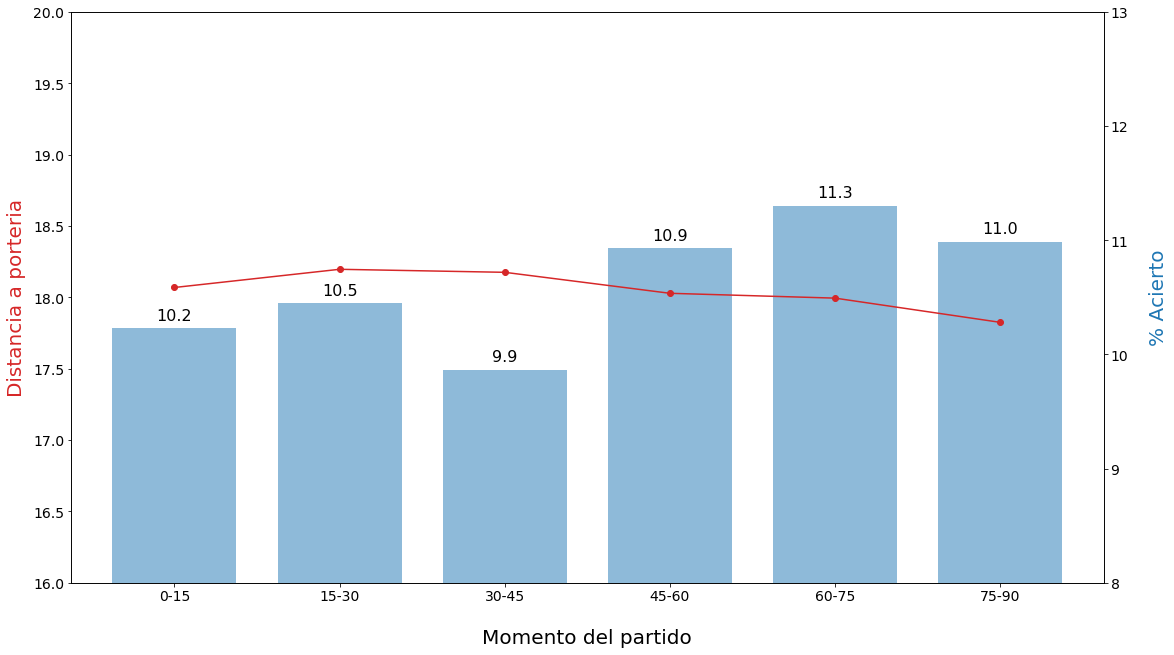

In [11]:
g = df_non_penaltyv.groupby('match_moment')[['goal','distance_to_goal']].mean()
g.reset_index()
g['goal'] = (g.goal)*100
g['match_moment'] = ['0-15','15-30','30-45','45-60','60-75','75-90']
color = 'tab:blue'
ax = g.plot.bar(x="match_moment", y="goal", legend=False,  color = color, alpha=0.5, width = 0.75)
color = 'tab:red'
ax.set_ylabel('Distancia a porteria', fontsize=20, labelpad=45, color = color)
ax.set_xlabel('Momento del partido', fontsize=20, labelpad=25)
ax2 = ax.twinx()
ax2.set(ylim=(16, 20))
ax.set(ylim=(8, 13))
g.plot(x='match_moment', y="distance_to_goal", legend=False, marker='o', color = color, ax=ax2)
color = 'tab:blue'
ax2.set_ylabel('% Acierto', fontsize=20, labelpad=45, color = color)
ax.yaxis.tick_right()
ax2.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(labelrotation=0)
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,                      # Vertically align label differently for positive and negative values.
            size = 16)                  # Fontsize
                                        
add_value_labels(ax)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

Pivot table of the % Succes of shots at diferent distances by match moment

In [12]:
pt1 = pd.pivot_table(df_non_penaltyv, values='goal', index=['match_moment'],
                    columns=['distance_bins'], aggfunc=np.mean)
pt1 = pt1*100
pt1 = pt1.round(2)
pt1

distance_bins,3.477521,6.837096,10.496876,14.311126,18.254915,22.217547,26.051086,29.881339,33.558092,37.475057
match_moment,,,,,,,,,,
0-15,57.89,27.25,15.50,11.80,5.36,3.56,2.78,1.99,2.46,0.00
15-30,54.55,28.24,16.54,11.18,7.55,3.92,2.21,2.18,0.52,0.00
30-45,53.24,25.42,15.00,10.20,6.82,4.65,3.02,2.25,2.34,1.15
45-60,62.89,28.18,17.11,12.15,6.86,3.74,3.16,2.11,1.65,1.04
60-75,60.65,29.19,15.64,13.12,6.62,6.32,3.00,2.97,1.97,1.82
75-90,51.89,28.59,16.39,12.37,6.81,4.82,2.77,2.10,1.40,0.00


In [13]:
pt1 = pd.pivot_table(df_non_penaltyv, values='goal', index=['match_moment'],
                    columns=['distance_bins'], aggfunc='count')
pt1 = pt1.round(2)
pt1

distance_bins,3.477521,6.837096,10.496876,14.311126,18.254915,22.217547,26.051086,29.881339,33.558092,37.475057
match_moment,,,,,,,,,,
0-15,133,800,1323,1653,1212,1066,1009,755,284,53
15-30,154,949,1602,1914,1364,1225,1311,916,386,64
30-45,139,956,1733,1971,1408,1248,1291,979,342,87
45-60,159,1068,1946,2247,1706,1364,1489,994,363,96
60-75,155,973,1669,2112,1586,1346,1365,874,304,55
75-90,212,1322,2355,2902,2042,1741,1731,1141,428,86


Graphic of the % Succes of shots at diferent distances by moment of the match

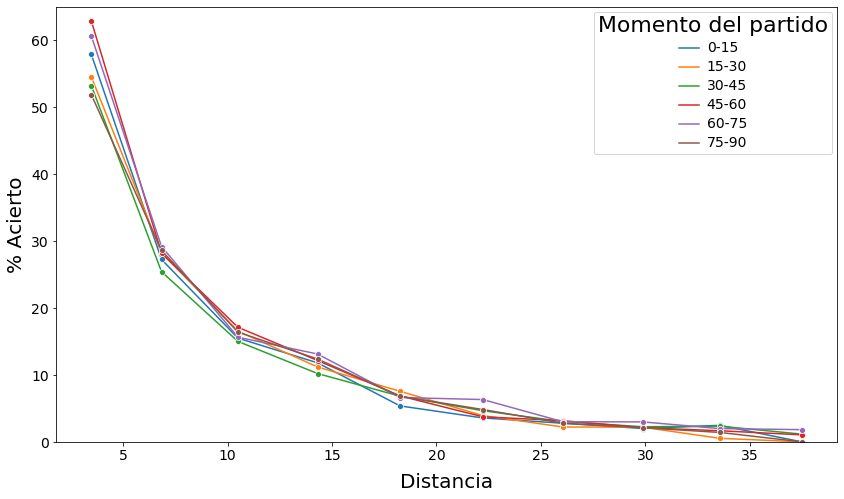

In [14]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="match_moment", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.legend(title = "Momento del partido")
ax.set(ylim=(0.0, 65))
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent distances by type of competition

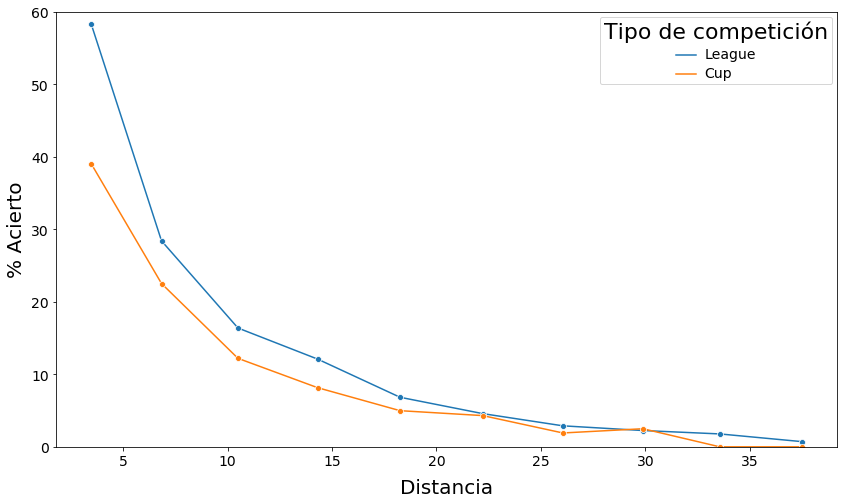

In [15]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="competition_type", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 60))
ax.legend(title = "Tipo de competición")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Table with % of goals, mean of the distance and mean of shots for home and away teams.

In [16]:
number_of_unique_values = len(set(df_non_penalty.match_id))
number_of_unique_values

2720

In [17]:
g1=df_non_penalty.groupby(['H_A_column']).agg({'goal':'mean','distance_to_goal':'mean'})
g1['shots']=df_non_penaltyv.groupby(['H_A_column']).agg({'match_id':'count'})
g1['shots']=g1.shots/(2720)
g1['goal'] = g1['goal']*100
g1 = g1.round(2)
g1

,goal,distance_to_goal,shots
H_A_column,,,
Away Team,10.40,18.36,10.60
Home Team,10.79,18.09,12.99


Graphic of the % Succes of shots at diferent distances by field factor

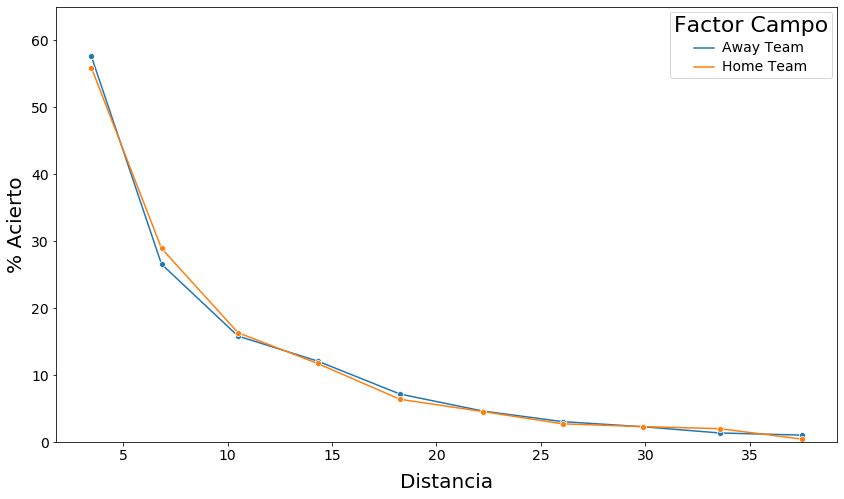

In [18]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="H_A_column", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 65))
ax.legend(title = "Factor Campo")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Pivot table of the % Succes of shots at diferent competition parts

In [19]:
g = df_non_penaltyv.groupby('competition_part')[['goal','distance_to_goal']].mean()
g = g.sort_values(['goal']).reset_index()
g

,competition_part,goal,distance_to_goal
0,group,0.085417,17.539753
1,knockout,0.091044,17.621318
2,start,0.105526,18.354877
3,middle,0.108745,17.993781
4,final,0.110171,17.865015


In [20]:
pt2 = pd.pivot_table(df_non_penaltyv, values='goal', index=['competition_part'],
                    columns=['distance_bins'], aggfunc=np.mean)
pt2 = pt2*100
pt2

distance_bins,3.477521,6.837096,10.496876,14.311126,18.254915,22.217547,26.051086,29.881339,33.558092,37.475057
competition_part,,,,,,,,,,
final,56.630824,28.873612,16.911986,12.018415,7.029635,4.617254,2.556818,1.847437,2.188552,0.000000
group,41.666667,20.147420,12.765957,7.952286,4.694836,4.147465,1.630435,2.419355,0.000000,0.000000
knockout,31.818182,29.496403,11.020408,8.571429,5.555556,4.705882,2.564103,2.654867,0.000000,0.000000
middle,59.800664,29.331942,15.823529,12.131464,6.675523,4.593070,2.801644,2.445961,1.386749,1.449275
start,58.275862,26.880466,16.448836,12.150026,6.804198,4.517454,3.318846,2.416756,1.788171,0.657895


Graphic of the % of succes of shots for differents competition parts.

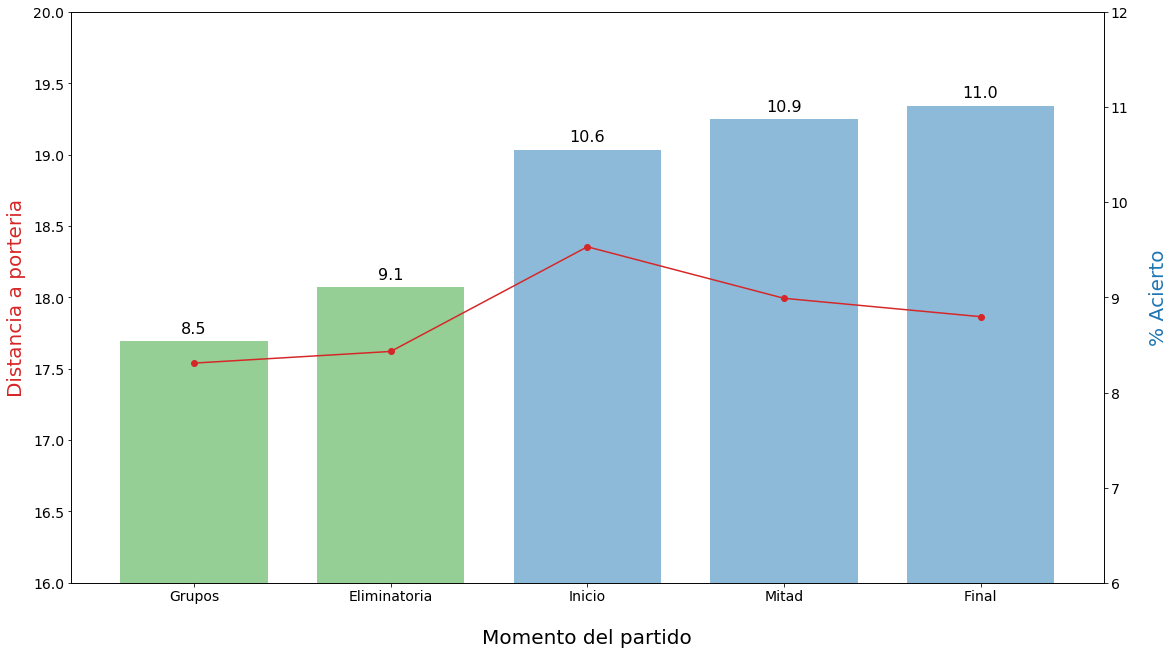

In [21]:
g = df_non_penaltyv.groupby('competition_part')[['goal','distance_to_goal']].mean()
g = g.sort_values(['goal']).reset_index()
g['goal'] = (g.goal)*100
g['competition_part'] = ['Grupos','Eliminatoria','Inicio','Mitad','Final']
color = 'tab:blue'
ax = g.plot.bar(x="competition_part", y="goal", legend=False,  color = ['tab:green','tab:green','tab:blue','tab:blue',
                                                                        'tab:blue'], alpha=0.5, width = 0.75)
color = 'tab:red'
ax.set_ylabel('Distancia a porteria', fontsize=20, labelpad=45, color = color)
ax.set_xlabel('Momento del partido', fontsize=20, labelpad=25)
ax2 = ax.twinx()
ax2.set(ylim=(16, 20))
ax.set(ylim=(6, 12))
g.plot(x='competition_part', y="distance_to_goal", legend=False, marker='o', color = color, ax=ax2)
color = 'tab:blue'
ax2.set_ylabel('% Acierto', fontsize=20, labelpad=45, color = color)
ax.yaxis.tick_right()
ax2.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(labelrotation=0)
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,                      # Vertically align label differently for positive and negative values.
            size = 16)                  # Fontsize
                                        
add_value_labels(ax)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

Graphic of the % Succes of shots at diferent distances by part of the competition (only league matches)

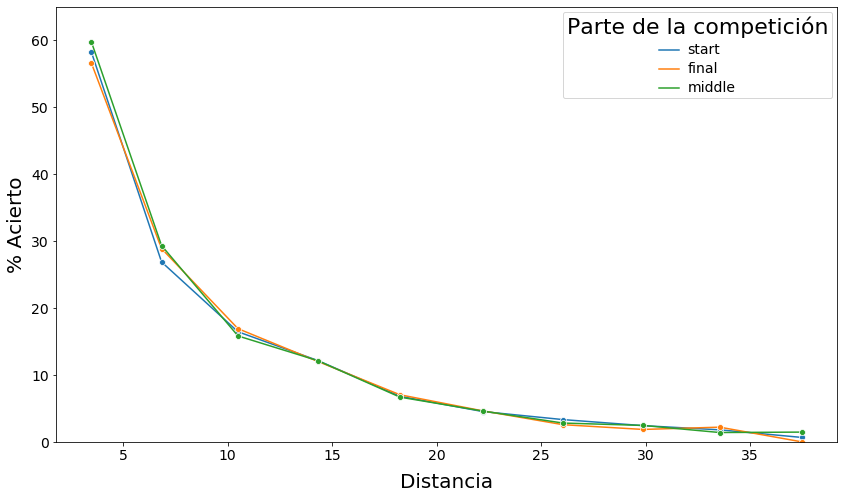

In [22]:
df_non_penaltyv = df_non_penalty[(df_non_penalty.competition_part != "group") & 
                                 (df_non_penalty.competition_part != "knockout")].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.distance_to_goal < 40].copy()
df_non_penaltyv['distance_bins'] = pd.cut(df_non_penaltyv['distance_to_goal'],bins=10)
df_non_penaltyv['distance_bins'] = df_non_penaltyv.groupby('distance_bins')['distance_to_goal'].transform('mean')
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="competition_part", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 65))
ax.legend(title = "Parte de la competición")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent distances by part of the competition (only cup matches)

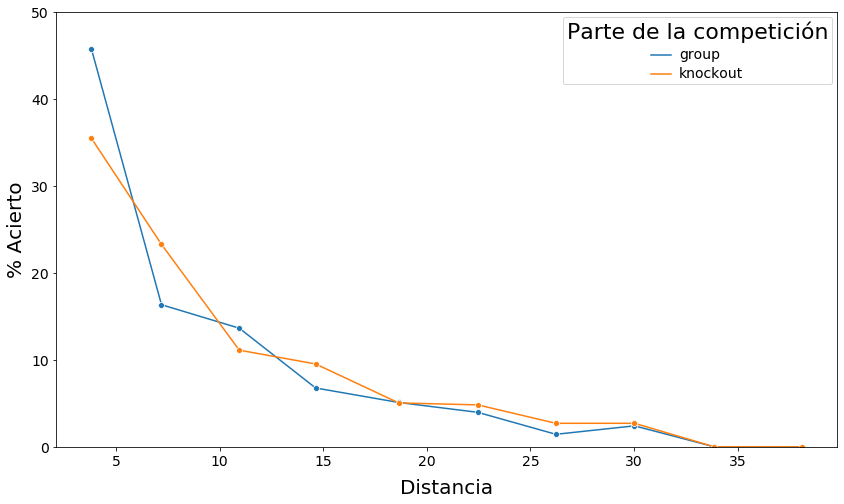

In [23]:
df_non_penaltyv = df_non_penalty[(df_non_penalty.competition_part == "group") | 
                                 (df_non_penalty.competition_part == "knockout")].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.distance_to_goal < 40].copy()
df_non_penaltyv['distance_bins'] = pd.cut(df_non_penaltyv['distance_to_goal'],bins=10)
df_non_penaltyv['distance_bins'] = df_non_penaltyv.groupby('distance_bins')['distance_to_goal'].transform('mean')
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="competition_part", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 50))
ax.legend(title = "Parte de la competición")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Show number of shots for every angle bin (created for an easier visualization)

In [24]:
df_non_penaltyv = df_non_penalty[df_non_penalty.visible_angle < 1].copy()
# df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle > 0.03].copy()
df_non_penaltyv['angle_bins'] = pd.cut(df_non_penaltyv['visible_angle'],bins=10)
df_non_penaltyv['angle_bins'] = df_non_penaltyv.groupby('angle_bins')['visible_angle'].transform('mean')*180/np.pi
g2=df_non_penaltyv.groupby(['angle_bins']).agg({'match_id':'count'})
g2

,match_id
angle_bins,
4.272199,174
9.883911,3761
14.379149,22470
19.717921,13261
25.657954,7770
31.275334,5468
36.978571,3657
42.548006,2226
48.142223,1805


Graphic of the % Succes of shots at diferent visible angles by match moment

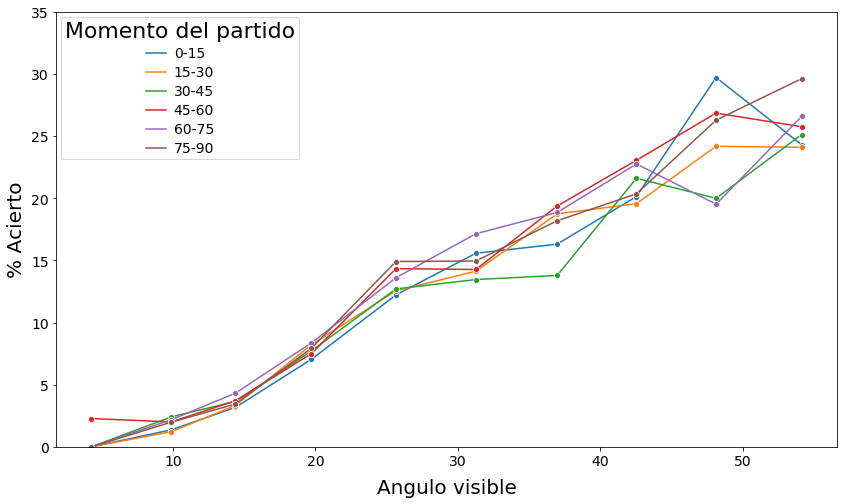

In [25]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="match_moment", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 35))
ax.legend(title = "Momento del partido")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent visible angles by competition type

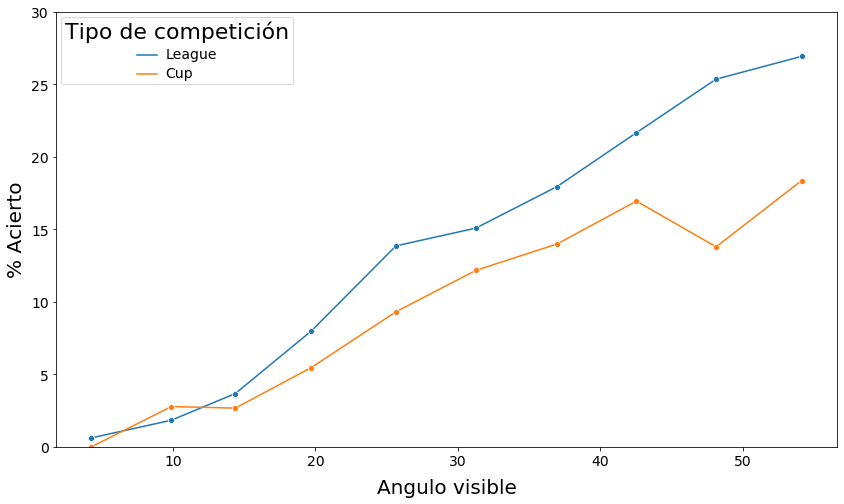

In [26]:
fig = plt.gcf()
fig.set_size_inches(14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="competition_type", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 30))
ax.legend(title = "Tipo de competición")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Pivot table of the % Succes of shots depending on the field factor.

In [27]:
pt2 = pd.pivot_table(df_non_penaltyv, values='goal', index=['H_A_column'],
                    columns=['angle_bins'], aggfunc=np.mean)
pt2 = pt2*100
pt2

angle_bins,4.272199,9.883911,14.379149,19.717921,25.657954,31.275334,36.978571,42.548006,48.142223,54.151787
H_A_column,,,,,,,,,,
Away Team,0.000000,1.902017,3.655071,8.012068,13.617141,15.069050,17.048977,21.18019,23.821656,27.047619
Home Team,0.980392,1.875617,3.571137,7.662783,13.497514,14.770459,18.101761,21.37823,24.901961,25.541796


Graphic of the % Succes of shots at diferent visible angles by field factor

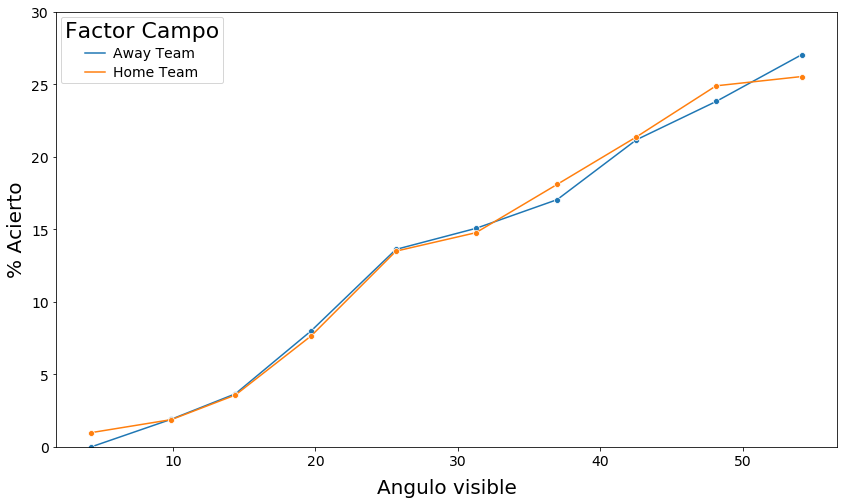

In [28]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="H_A_column", data=df_non_penaltyv, 
                ci=None, marker='o')
ax.set(ylim=(0.0, 30))
ax.legend(title = "Factor Campo")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent visible angles by part of the competition (only league matches)

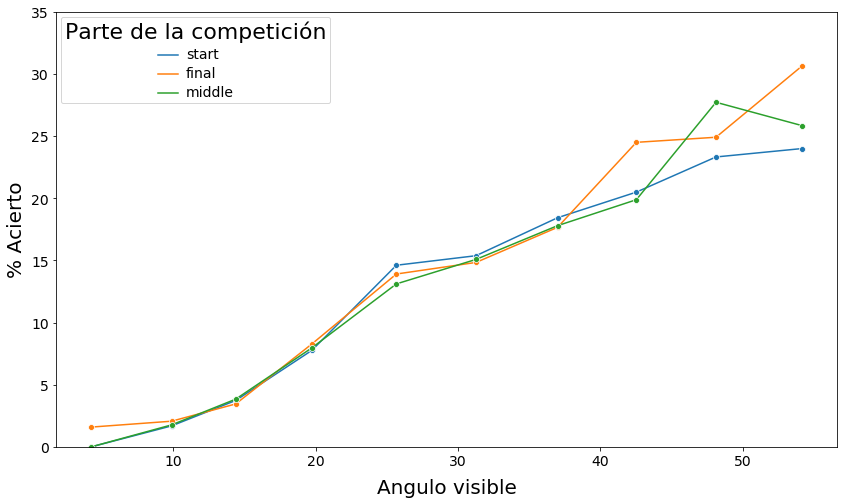

In [29]:
df_non_penaltyv = df_non_penalty[(df_non_penalty.competition_part != "group") & 
                                 (df_non_penalty.competition_part != "knockout")].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle < 1].copy()
df_non_penaltyv['angle_bins'] = pd.cut(df_non_penaltyv['visible_angle'],bins=10)
df_non_penaltyv['angle_bins'] = df_non_penaltyv.groupby('angle_bins')['visible_angle'].transform('mean')*180/np.pi

fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="competition_part", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 35))
ax.legend(title = "Parte de la competición")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent visible angles by part of the competition (only cup matches)

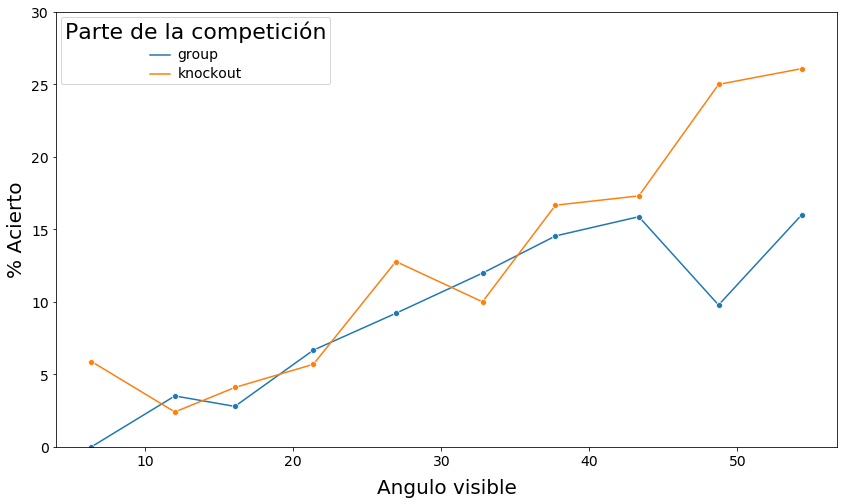

In [30]:
df_non_penaltyv = df_non_penalty[(df_non_penalty.competition_part == "group") |
                                 (df_non_penalty.competition_part == "knockout")].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle < 1].copy()
df_non_penaltyv['angle_bins'] = pd.cut(df_non_penaltyv['visible_angle'],bins=10)
df_non_penaltyv['angle_bins'] = df_non_penaltyv.groupby('angle_bins')['visible_angle'].transform('mean')*180/np.pi

fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="competition_part", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 30))
ax.legend(title = "Parte de la competición")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Table with the % of succes of shots, the mean of the distance and the % of counter attacks by +/- difference of players on the pitch.

In [31]:
df_non_penalty['diff_players'] = df_non_penalty.players - df_non_penalty.players_rival
g = df_non_penalty.groupby('diff_players')[['goal','distance_to_goal']].mean()
g['shots'] = df_non_penalty.groupby('diff_players')['match_id'].count()
g['counter_attack'] = df_non_penalty.groupby('diff_players')['counter_attack'].sum()
g['% counter'] = g.counter_attack / g.shots * 100
g['goal'] = g['goal']*100
g = g.sort_values(['diff_players']).reset_index()
g = g.round(2)
g

,diff_players,goal,distance_to_goal,shots,counter_attack,% counter
0,-2.0,11.11,16.59,9,0,0.00
1,-1.0,9.59,19.61,980,68,6.94
2,0.0,10.58,18.19,61215,3099,5.06
3,1.0,11.99,18.23,2286,91,3.98
4,2.0,25.00,17.78,16,1,6.25


Graphic of the % Succes of shots at diferent distances by own team players

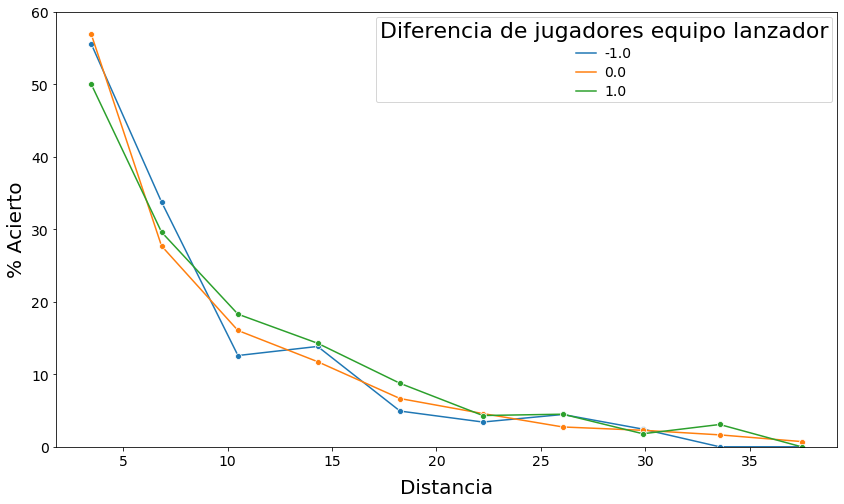

In [32]:
df_non_penaltyv = df_non_penalty[(df_non_penalty.diff_players < 1.5) & (df_non_penalty.diff_players > -1.5)].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.distance_to_goal < 40].copy()
df_non_penaltyv['distance_bins'] = pd.cut(df_non_penaltyv['distance_to_goal'],bins=10)
df_non_penaltyv['distance_bins'] = df_non_penaltyv.groupby('distance_bins')['distance_to_goal'].transform('mean')
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="diff_players", 
                data=df_non_penaltyv, ci=None, marker='o', palette = 'tab10')
ax.set(ylim=(0.0, 60))
ax.legend(title = "Diferencia de jugadores equipo lanzador")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Table with the % of succes of shots and the mean of the distance by number of shot.

In [33]:
df_non_penaltyv = df_non_penalty[df_non_penalty.shot_number < 20].copy()
g = df_non_penaltyv.groupby('shot_number')[['goal','distance_to_goal']].mean()
g.reset_index()
g['goal'] = (g.goal)*100
g = g.round(2)
g

,goal,distance_to_goal
shot_number,,
1.0,9.71,18.77
2.0,9.57,18.64
3.0,9.51,18.54
4.0,9.78,18.63
5.0,10.12,18.34
6.0,9.83,18.56
7.0,10.06,18.29
8.0,10.32,18.20
9.0,10.76,18.00


Graphic of the % Succes of shots and distance from goal for every number of shot of the team.

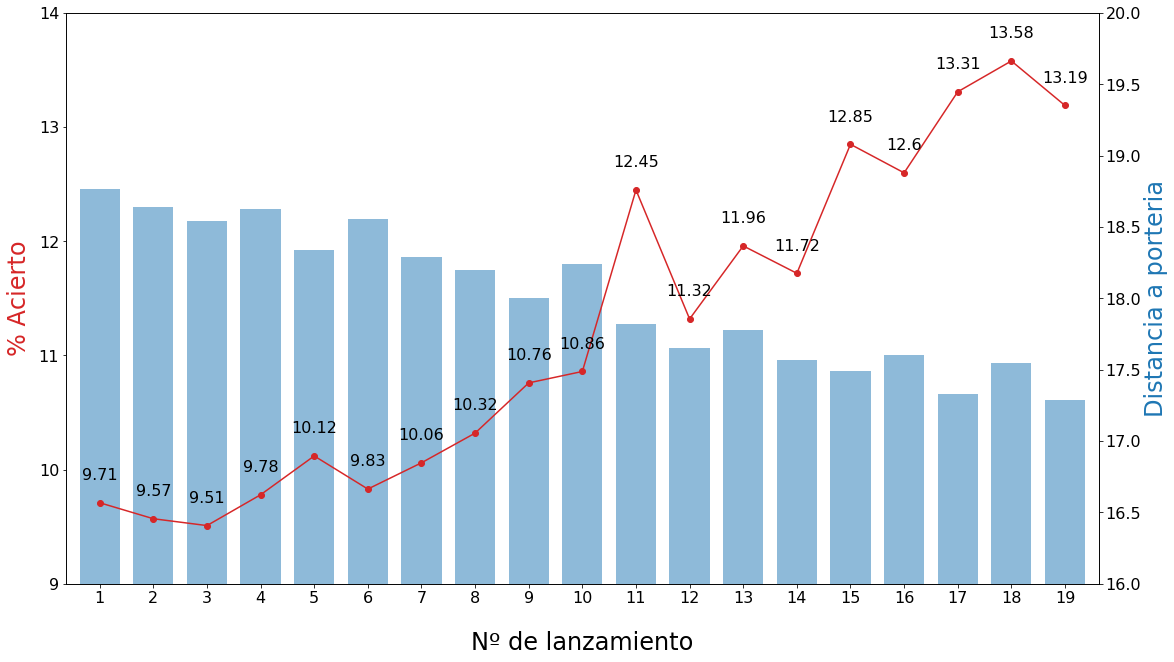

In [34]:
g['shot_number'] = ("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19")
color = 'tab:blue'
ax = g.plot.bar(x="shot_number", y="distance_to_goal", legend=False,  color = color, alpha=0.5, width = 0.75)
color = 'tab:red'
ax.set_ylabel('% Acierto', fontsize=24, labelpad=35, color = color)
ax.set_xlabel('Nº de lanzamiento', fontsize=24, labelpad=25)
ax2 = ax.twinx()
ax.set(ylim=(16, 20))
ax2.set(ylim=(9, 14))
g.plot(x="shot_number", y="goal", legend=False, marker='o', ax=ax2, color = color)
color = 'tab:blue'
ax2.set_ylabel('Distancia a porteria', fontsize=24, labelpad=45, color = color)
ax.yaxis.tick_right()
ax2.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(labelrotation=0)
for index, value in enumerate(g['goal']):
    plt.text(index, value+0.2, str(value), size = 16, ha = 'center')
        
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

Table with the % of succes of shots and the mean of the distance by number of shot.

In [49]:
df_non_penaltyv = df_non_penalty[df_non_penalty.shot_player_number < 7].copy()
g = df_non_penaltyv.groupby('shot_player_number')[['goal','distance_to_goal']].mean()
g.reset_index()
g['goal'] = (g.goal)*100
g = g.round(2)
g

,goal,distance_to_goal
shot_player_number,,
1.0,9.48,18.66
2.0,10.49,18.16
3.0,12.18,17.56
4.0,14.20,17.11
5.0,14.33,16.92
6.0,15.82,16.26


Graphic of the % Succes of shots and distance from goal for every number of shot of the player.

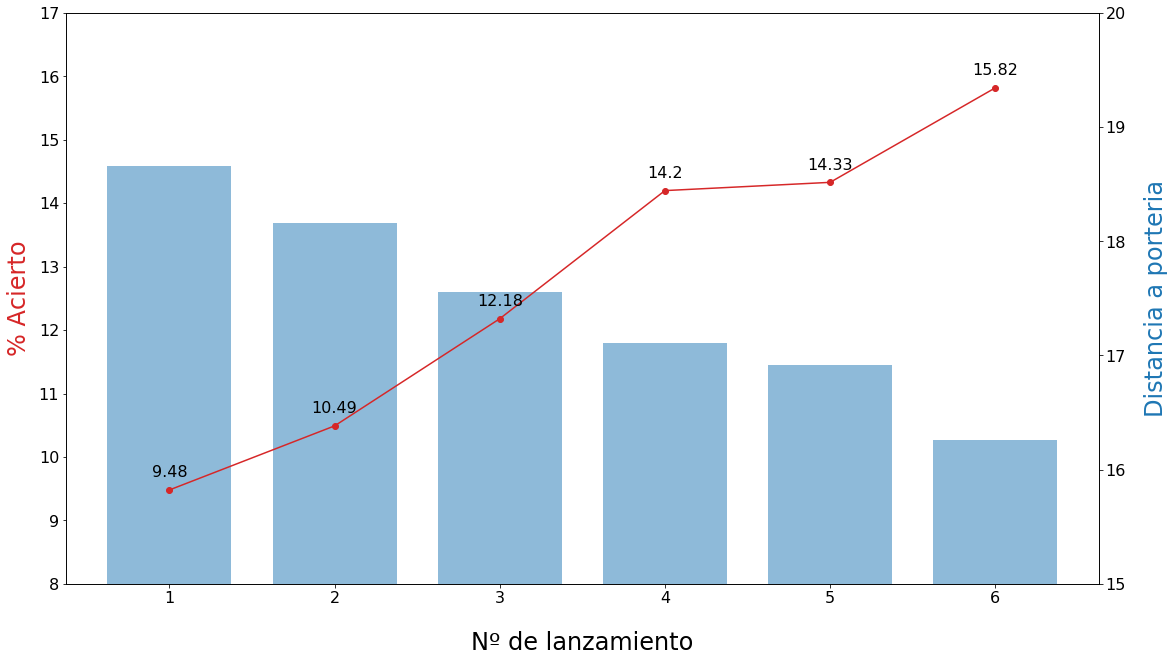

In [35]:
df_non_penaltyv = df_non_penalty[df_non_penalty.shot_player_number < 7].copy()
g = df_non_penaltyv.groupby('shot_player_number')[['goal','distance_to_goal']].mean()
g.reset_index()
g['goal'] = (g.goal)*100
g = g.round(2)
g['shot_player_number'] = ("1","2","3","4","5","6")
color = 'tab:blue'
ax = g.plot.bar(x="shot_player_number", y="distance_to_goal", legend=False,  color = color, alpha=0.5, width = 0.75)
color = 'tab:red'
ax.set_ylabel('% Acierto', fontsize=24, labelpad=35, color = color)
ax.set_xlabel('Nº de lanzamiento', fontsize=24, labelpad=25)
ax2 = ax.twinx()
ax.set(ylim=(15, 20))
ax2.set(ylim=(8, 17))
g.plot(x="shot_player_number", y="goal", legend=False, marker='o', ax=ax2, color = color)
color = 'tab:blue'
ax2.set_ylabel('Distancia a porteria', fontsize=24, labelpad=45, color = color)
ax.yaxis.tick_right()
ax2.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(labelrotation=0)
for index, value in enumerate(g['goal']):
    plt.text(index, value+0.2, str(value), size = 16, ha = 'center')

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

Table with the % of succes of shots by number of shots in Shot Zones 2 and 3.

In [36]:
df_non_penaltyv = df_non_penalty[df_non_penalty.shot_zone_number < 9].copy()
df_non_penaltyv = df_non_penaltyv[(df_non_penaltyv.shot_zone == "Zone 2") | (df_non_penaltyv.shot_zone == "Zone 3")].copy()
pt1 = pd.pivot_table(df_non_penaltyv, values='goal', index=['shot_zone_number'],
                    columns=['shot_zone'], aggfunc=np.mean)
pt1 = pt1*100
pt1 = pt1.round(2)
pt1

shot_zone,Zone 2,Zone 3
shot_zone_number,,
1.0,21.52,10.79
2.0,20.91,11.25
3.0,23.88,11.00
4.0,22.89,11.78
5.0,23.52,11.59
6.0,25.24,11.13
7.0,24.43,14.26
8.0,25.30,16.50


In [37]:
df_non_penaltyv = df_non_penalty[df_non_penalty.shot_zone_number < 9].copy()
df_non_penaltyv = df_non_penaltyv[(df_non_penaltyv.shot_zone == "Zone 2") | (df_non_penaltyv.shot_zone == "Zone 3")].copy()
pt1 = pd.pivot_table(df_non_penaltyv, values='goal', index=['shot_zone_number'],
                    columns=['shot_zone'], aggfunc=np.mean)
pt1 = pt1*100
pt1 = pt1.round(2)
pt1

shot_zone,Zone 2,Zone 3
shot_zone_number,,
1.0,21.52,10.79
2.0,20.91,11.25
3.0,23.88,11.00
4.0,22.89,11.78
5.0,23.52,11.59
6.0,25.24,11.13
7.0,24.43,14.26
8.0,25.30,16.50


Graphic of the % Succes of shots for every number of shot of the team in specific match zones.

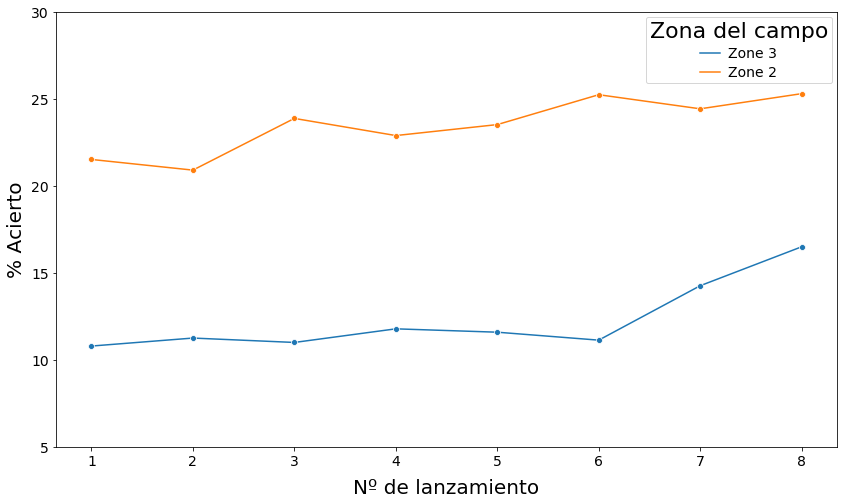

In [38]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="shot_zone_number", y="goal",  hue="shot_zone", ci = None, data=df_non_penaltyv, 
                estimator=lambda y: sum(y==1)*100.0/len(y), marker='o')
ax.set(ylim=(5, 30))
ax.legend(title = "Zona del campo")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Nº de lanzamiento', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

In [50]:
df_non_penaltyv = df_non_penalty[df_non_penalty.shot_zone_player_number < 5].copy()
df_non_penaltyv = df_non_penaltyv[(df_non_penaltyv.shot_zone == "Zone 2") | (df_non_penaltyv.shot_zone == "Zone 3")].copy()
pt1 = pd.pivot_table(df_non_penaltyv, values='goal', index=['shot_zone_player_number'],
                    columns=['shot_zone'], aggfunc=np.mean)
pt1 = pt1*100
pt1 = pt1.round(2)
pt1

shot_zone,Zone 2,Zone 3
shot_zone_player_number,,
1.0,21.59,11.01
2.0,24.68,12.37
3.0,24.78,14.93
4.0,31.47,15.80


Graphic of the % Succes of shots for every number of shot of the player in specific match zones.

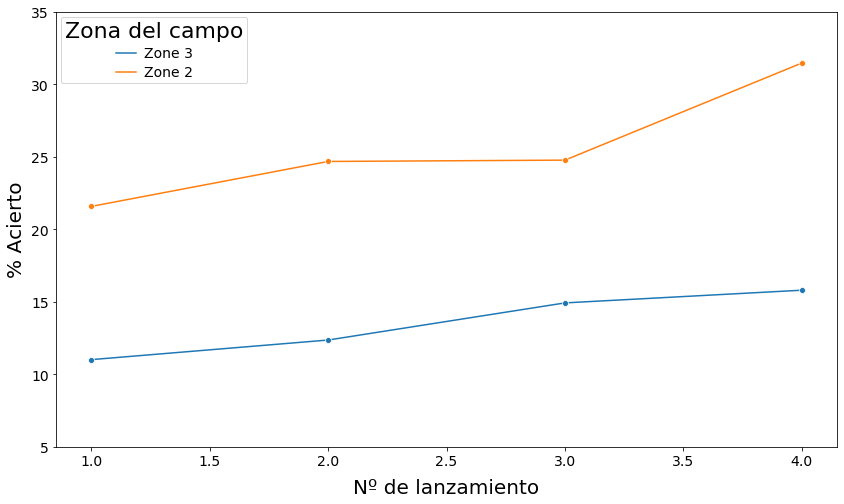

In [51]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="shot_zone_player_number", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="shot_zone", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(5, 35))
ax.legend(title = "Zona del campo")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Nº de lanzamiento', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

# Penalty shots

Show all the penalty columns

In [40]:
df_penalty.head()

,match_id,dataset,statsbomb_id,wyscout_id,statsbomb_team_id,wyscout_team_id,team_id,team_name,player_id_statsbomb,player_id_wyscout,player_id,Name,firstName,middleName,lastName,competition_gender,competition_name,competition_type,match_week,competition_part,H_A_column,minute,match_moment,shot_number,shot_player_number,players,players_rival,goal
255,22912,statsbomb,642e3db4-bfa4-4ed2-9a22-468e68bd6e0a,NaN,24.0,NaN,219,Liverpool,3531.0,NaN,12,Mohamed Salah,Mohamed,,Salah,male,Champions League,Cup,13.0,knockout,Away Team,1.809467,0-15,1.0,1.0,11.0,11.0,True
335,19790,statsbomb,7de52ec3-eec3-4c62-a5a8-a604877907bb,NaN,746.0,NaN,146,Manchester City WFC,4654.0,NaN,2390,Nikita Parris,Nikita,,Parris,female,FA Women's Super League,League,15.0,final,Home Team,2.255517,0-15,1.0,1.0,11.0,11.0,True
508,68354,statsbomb,33d46a14-0366-4718-bdd1-74f1c5423d17,NaN,217.0,NaN,175,Barcelona,25879.0,NaN,2297,Ronaldo de Assis Moreira,Ronaldo,de Assis,Moreira,male,La Liga,League,13.0,middle,Home Team,3.111500,0-15,1.0,1.0,11.0,11.0,False
569,7576,statsbomb,e6f0cb10-4f5d-40fc-965a-47effe26cbe7,NaN,780.0,NaN,201,Portugal,5207.0,NaN,34,Cristiano Ronaldo dos Santos Aveiro,Cristiano,Ronaldo dos Santos,Aveiro,male,FIFA World Cup,Cup,1.0,group,Home Team,3.467333,0-15,1.0,1.0,11.0,11.0,True
790,22981,statsbomb,a1a592be-425c-49e9-90b0-6e8638b07500,NaN,852.0,NaN,112,Norway Women's,10386.0,NaN,2516,Caroline Graham Hansen,Caroline,Graham,Hansen,female,Women's World Cup,Cup,3.0,group,Away Team,4.573400,0-15,1.0,1.0,11.0,11.0,True


Graphic of the % Succes of penalties by competition type.

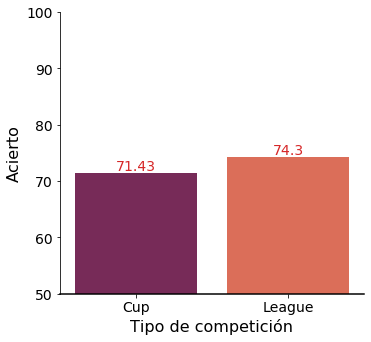

In [41]:
g = df_penalty.groupby('competition_type')[['goal']].mean()
g = g.sort_values(['goal']).reset_index()
g['goal'] = round(g.goal,4)*100
ax = sns.barplot(x="competition_type", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_ylabel("Acierto", size=16)
ax.set_xlabel("Tipo de competición", size=16)
ax.set_xticklabels(g.competition_type)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center', size=14)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
ax.tick_params(axis='both', which='major', labelsize=14)
fig = plt.gcf()
fig.set_size_inches(5, 5)

Graphic of the % Succes of penalties by competition part.

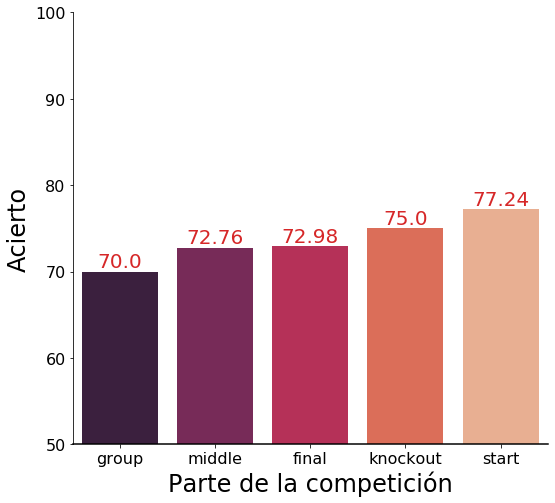

In [42]:
g = df_penalty.groupby('competition_part')[['goal']].mean()
g = g.sort_values(['goal']).reset_index()
g['goal'] = round(g.goal,4)*100
ax = sns.barplot(x="competition_part", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_ylabel("Acierto", size = 24)
ax.set_xlabel("Parte de la competición", size = 24)
ax.set_xticklabels(g.competition_part)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center', size = 20)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
ax.tick_params(axis='both', which='major', labelsize=16)
fig = plt.gcf()
fig.set_size_inches(8, 8)

Graphic of the % Succes of penalties by match moment.

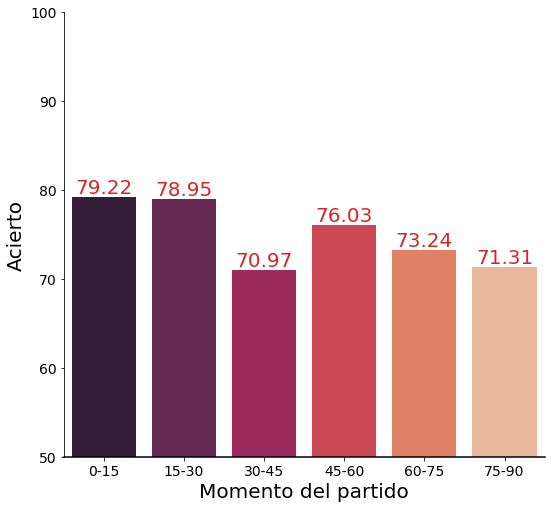

In [43]:
g = df_penalty.groupby('match_moment')[['goal']].mean()
g = g.reset_index()
g['goal'] = round(g.goal,4)*100
g.goal.replace(73.24000000000001, 73.24, inplace=True)
ax = sns.barplot(x="match_moment", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_ylabel("Acierto", fontsize=20)
ax.set_xlabel("Momento del partido", fontsize=20)
ax.set_xticklabels(g.match_moment)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center', size=20)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
ax.tick_params(axis='both', which='major', labelsize=14)
fig = plt.gcf()
fig.set_size_inches(8, 8)

Graphic of the % Succes of penalties by field factor.

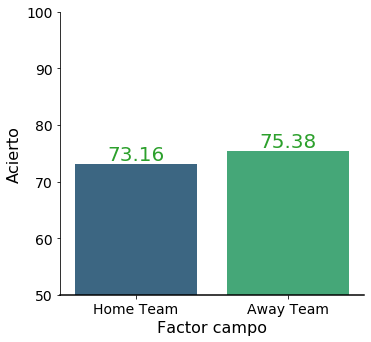

In [44]:
g = df_penalty.groupby('H_A_column')[['goal']].mean()
g = g.sort_values(['goal']).reset_index()
g['goal'] = round(g.goal,4)*100
ax = sns.barplot(x="H_A_column", y="goal", palette="viridis", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_ylabel("Acierto", size=16)
ax.set_xlabel("Factor campo", size=16)
ax.set_xticklabels(g.H_A_column)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color="tab:green", va ='bottom', ha ='center', size=20)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
ax.tick_params(axis='both', which='major', labelsize=14)
fig = plt.gcf()
fig.set_size_inches(5, 5)

Table of the % of succes of penaltis and number of penaltis by number of shot the penalty was.

In [54]:
mask = df.shot_number > 15
df_penaltyv = df_penalty.copy()
df_penaltyv.loc[mask, "shot_number"] = "16+"
mask = (df.shot_number <= 15) & (df.shot_number > 9)
df_penaltyv.loc[mask, "shot_number"] = "10-15"
mask = (df.shot_number <= 10) & (df.shot_number > 5)
df_penaltyv.loc[mask, "shot_number"] = "06-10"
mask = (df.shot_number <= 5)
df_penaltyv.loc[mask, "shot_number"] = "01-05"
g = df_penaltyv.groupby('shot_number')[['goal']].mean()
g['shots'] = df_penaltyv.groupby('shot_number')[['match_id']].count()
g = g.sort_values(['shot_number']).reset_index()
g['goal'] = round(g.goal,4)*100
g

,shot_number,goal,shots
0,01-05,75.50,298
1,06-10,75.19,270
2,10-15,70.00,150
3,16+,72.82,103


Graphic of the % Succes of penalties by number of the shot of the team.

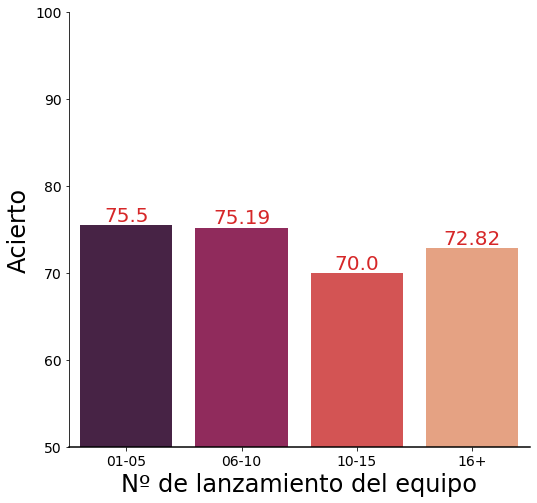

In [55]:
ax = sns.barplot(x="shot_number", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_ylabel("Acierto", size = 24)
ax.set_xlabel("Nº de lanzamiento del equipo", size = 24)
ax.set_xticklabels(g.shot_number)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center', size=20)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
ax.tick_params(axis='both', which='major', labelsize=14)
fig = plt.gcf()
fig.set_size_inches(8, 8)

Table of the % of succes of penaltis and number of penaltis by number of shot the penalty was for the shooter.

In [62]:
mask = df.shot_player_number >= 5
df_penaltyv = df_penalty.copy()
df_penaltyv.loc[mask, "shot_player_number"] = "05+"
g = df_penaltyv.groupby('shot_player_number')[['goal']].mean()
g['goal'] = round(g.goal,4)*100
g.goal.replace(78.320000000000001, 78.32, inplace=True)
g.goal.replace(70.39999999999999, 70.40, inplace=True)
g['shots'] = df_penaltyv.groupby('shot_player_number')[['goal']].count()
g = g.reset_index()
g

,shot_player_number,goal,shots
0,1.0,78.32,309
1,2.0,70.27,222
2,3.0,70.40,125
3,4.0,72.84,81
4,05+,75.00,84


Graphic of the % Succes of penalties by number of the shot of the player.

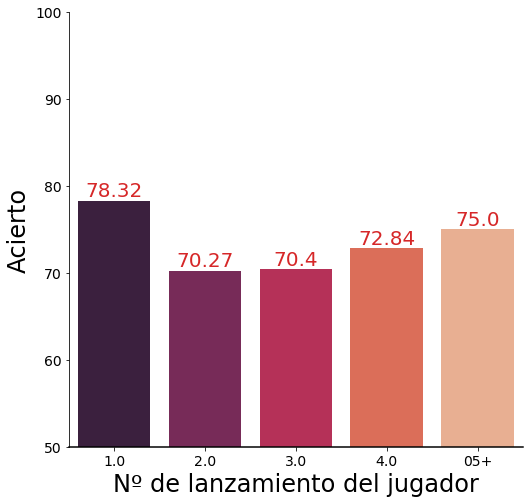

In [46]:

ax = sns.barplot(x="shot_player_number", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_ylabel("Acierto", size = 24)
ax.set_xlabel("Nº de lanzamiento del jugador", size = 24)
ax.set_xticklabels(g.shot_player_number)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center', size=20)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
ax.tick_params(axis='both', which='major', labelsize=14)
fig = plt.gcf()
fig.set_size_inches(8, 8)

Graphic of the % Succes of penalties by own team players.

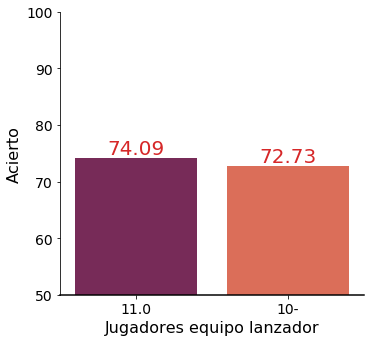

In [47]:
mask = df.players < 11
df_penaltyv = df_penalty.copy()
df_penaltyv.loc[mask, "players"] = "10-"
g = df_penaltyv.groupby('players')[['goal']].mean()
g = g.reset_index()
g['goal'] = round(g.goal,4)*100
g.goal.replace(72.72999999999999, 72.73, inplace=True)
ax = sns.barplot(x="players", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_ylabel("Acierto", size=16)
ax.set_xlabel("Jugadores equipo lanzador", size=16)
ax.set_xticklabels(g.players)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center', size=20)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
ax.tick_params(axis='both', which='major', labelsize=14)
fig = plt.gcf()
fig.set_size_inches(5, 5)

Graphic of the % Succes of penalties by rival team players.

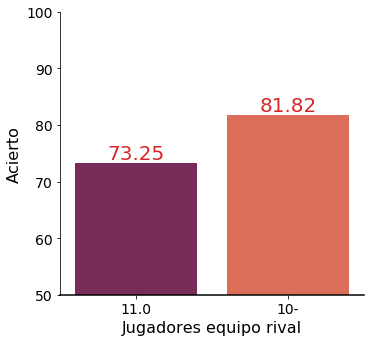

In [48]:
mask = df.players_rival < 11
df_penaltyv = df_penalty.copy()
df_penaltyv.loc[mask, "players_rival"] = "10-"
g = df_penaltyv.groupby('players_rival')[['goal']].mean()
g = g.reset_index()
g['goal'] = round(g.goal,4)*100
g.goal.replace(81.82000000000001, 81.82, inplace=True)
ax = sns.barplot(x="players_rival", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_ylabel("Acierto", size=16)
ax.set_xlabel("Jugadores equipo rival", size=16)
ax.set_xticklabels(g.players_rival)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center', size =20)
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
ax.tick_params(axis='both', which='major', labelsize=14)
fig = plt.gcf()
fig.set_size_inches(5, 5)